In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://github.com/MyungKyuYi/AI-class/raw/refs/heads/main/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [29]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [30]:
X = df.drop(columns = ['target']).values
y = df['target'].values

X

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [31]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1557)
print("학습 데이터 개수:", len(X_train))
print("테스트 데이터 개수:", len(X_test))

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

학습 데이터 개수: 242
테스트 데이터 개수: 61
(242, 13) (61, 13)
(242,) (61,)


In [33]:
# Decision Tree 모델 생성 및 학습
dt_model = DecisionTreeClassifier(random_state=1557)
dt_model.fit(X_train, y_train)

# 예측 및 평가, confusion matrix 출력
dt_pred = dt_model.predict(X_test)
print(f'Decision Tree Accuracy: {accuracy_score(y_test, dt_pred)}')
print(confusion_matrix(y_test, dt_pred))

Decision Tree Accuracy: 0.7377049180327869
[[19  7]
 [ 9 26]]


In [34]:
# Random Forest 모델 생성 및 학습
rf_model = RandomForestClassifier(random_state=1557)
rf_model.fit(X_train, y_train)

# 예측 및 평가, confusion matrix 출력
rf_pred = rf_model.predict(X_test)
print(f'Random Forest Accuracy: {accuracy_score(y_test, rf_pred)}')
print(confusion_matrix(y_test, rf_pred))

Random Forest Accuracy: 0.8360655737704918
[[23  3]
 [ 7 28]]


In [35]:
# Logistic Regression 모델 생성 및 학습
lr_model =LogisticRegression(max_iter=200, random_state=1557)
lr_model.fit(X_train, y_train)

# 예측 및 평가, confusion matrix 출력
lr_pred = lr_model.predict(X_test)
print(f'Logistic Regression: {accuracy_score(y_test, lr_pred)}')
print(confusion_matrix(y_test, lr_pred))

Logistic Regression: 0.8524590163934426
[[23  3]
 [ 6 29]]


In [36]:
# KNN 모델 생성 및 학습
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# 예측 및 평가, confusion matrix 출력
knn_pred = knn.predict(X_test)
print(f'KNN: {accuracy_score(y_test, knn_pred)}')
print(confusion_matrix(y_test, knn_pred))

KNN: 0.8360655737704918
[[21  5]
 [ 5 30]]


In [37]:
Y = pd.get_dummies(y).values

Y

array([[False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [Fal

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1557)
print("학습 데이터 개수:", len(X_train))
print("테스트 데이터 개수:", len(X_test))

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

학습 데이터 개수: 242
테스트 데이터 개수: 61
(242, 13) (61, 13)
(242, 2) (61, 2)


In [39]:
model = Sequential()

model.add(Dense(10, input_shape = (13, ), activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

model.compile(Adam(learning_rate = 0.04), loss = 'binary_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                140       
                                                                 
 dense_9 (Dense)             (None, 8)                 88        
                                                                 
 dense_10 (Dense)            (None, 6)                 54        
                                                                 
 dense_11 (Dense)            (None, 2)                 14        
                                                                 
Total params: 296
Trainable params: 296
Non-trainable params: 0
_________________________________________________________________


In [40]:
model_history = model.fit(X_train, y_train, epochs = 30, batch_size = 32, validation_split = 0.1)

Epoch 1/30
7/7 [==============================] - 0s 20ms/step - loss: 0.6052 - accuracy: 0.6866 - val_loss: 0.3635 - val_accuracy: 0.8400
Epoch 2/30
7/7 [==============================] - 0s 4ms/step - loss: 0.4975 - accuracy: 0.8203 - val_loss: 0.1677 - val_accuracy: 0.9600
Epoch 3/30
7/7 [==============================] - 0s 4ms/step - loss: 0.4122 - accuracy: 0.8341 - val_loss: 0.1371 - val_accuracy: 0.9600
Epoch 4/30
7/7 [==============================] - 0s 3ms/step - loss: 0.3483 - accuracy: 0.8479 - val_loss: 0.1599 - val_accuracy: 0.9600
Epoch 5/30
7/7 [==============================] - 0s 3ms/step - loss: 0.3280 - accuracy: 0.8756 - val_loss: 0.1580 - val_accuracy: 0.9200
Epoch 6/30
7/7 [==============================] - 0s 3ms/step - loss: 0.3088 - accuracy: 0.8848 - val_loss: 0.1628 - val_accuracy: 0.9200
Epoch 7/30
7/7 [==============================] - 0s 3ms/step - loss: 0.2752 - accuracy: 0.8940 - val_loss: 0.1648 - val_accuracy: 0.9200
Epoch 8/30
7/7 [=================

In [41]:
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis = 1)
y_pred_class = np.argmax(y_pred, axis = 1)

2/2 [==============================] - 0s 0s/step


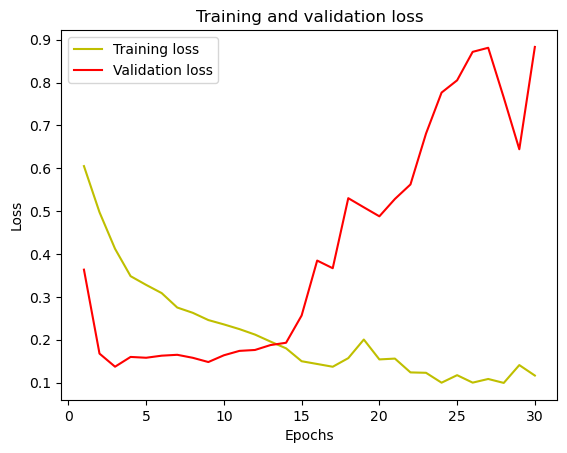

In [42]:
loss = model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

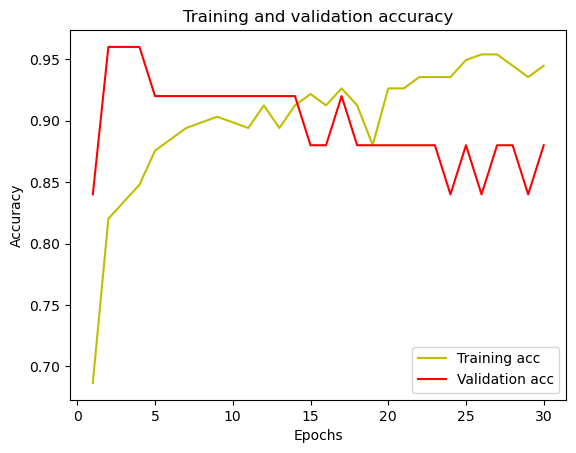

In [43]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [44]:
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.73      0.85      0.79        26
           1       0.87      0.77      0.82        35

    accuracy                           0.80        61
   macro avg       0.80      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61

[[22  4]
 [ 8 27]]
